In [5]:
import pandas as pd
import scipy.stats as stats
import math
import numpy as np
import warnings

In [11]:
warnings.filterwarnings('ignore')

# EDA

In [13]:
sample_size = 2000

In [15]:
z_critical = stats.norm.ppf(q = 0.95)

In [18]:
data = pd.read_csv('train_set.csv')

In [19]:
data_sample = data.sample(n=sample_size, random_state=0)

In [21]:
data.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category
0,15001,VENDOR-1676,GL-6100410,83.24,Artworking/Typesetting Production Jun 2009 Cha...,CLASS-1963
1,15002,VENDOR-1883,GL-2182000,51.18,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250
2,15004,VENDOR-1999,GL-6050100,79.02,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274
3,15005,VENDOR-1771,GL-6101400,48.50,Store Construction General Requirements Coloni...,CLASS-1522
4,15006,VENDOR-1331,GL-2182000,63.35,Jul 2015 Aydin Corp Contingent Labor/Temp Labo...,CLASS-1376


In [27]:
amount_mean = data_sample['Inv_Amt'].mean()
amount_std = data_sample['Inv_Amt'].std()

In [29]:
margin_of_error = z_critical * (amount_std/math.sqrt(sample_size))

In [30]:
confidence_interval = (amount_mean - margin_of_error,
                       amount_mean + margin_of_error)  

In [31]:
print("Confidence interval:")
print(confidence_interval)

Confidence interval:
(49.05476774093094, 51.186502259069144)


In [32]:
amount_true_mean=data['Inv_Amt'].mean()

print(("True mean: {}".format(amount_true_mean)))

True mean: 49.89003403933447


In [6]:
import matplotlib.pyplot as plt

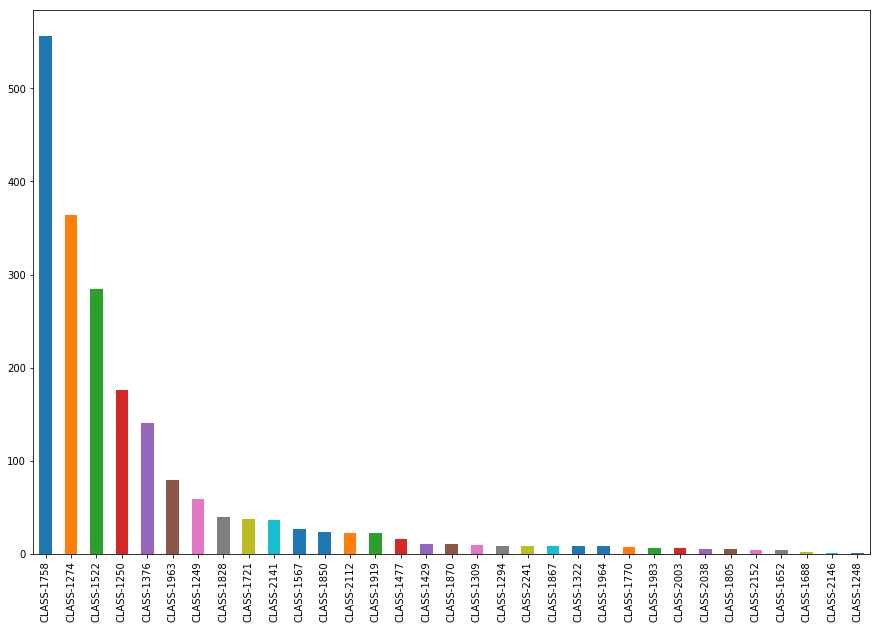

In [48]:
data_sample['Product_Category'].value_counts().plot(kind='bar', figsize=(15,10))

In [50]:
len(data_sample['Vendor_Code'].unique().tolist())

654

In [61]:
len(data_sample['Product_Category'].unique().tolist())

33

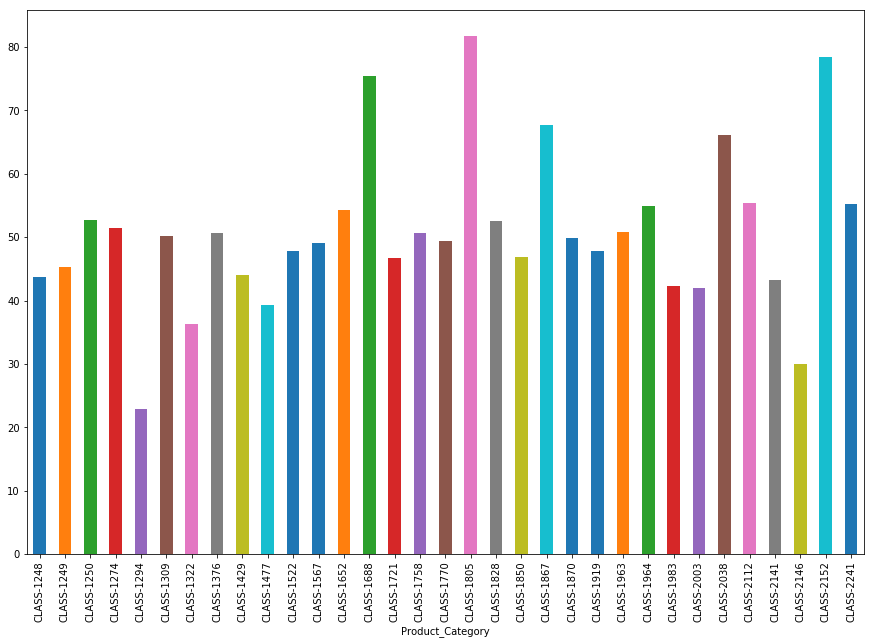

In [55]:
data_sample.groupby('Product_Category')['Inv_Amt'].mean().plot(kind='bar', figsize=(15,10))

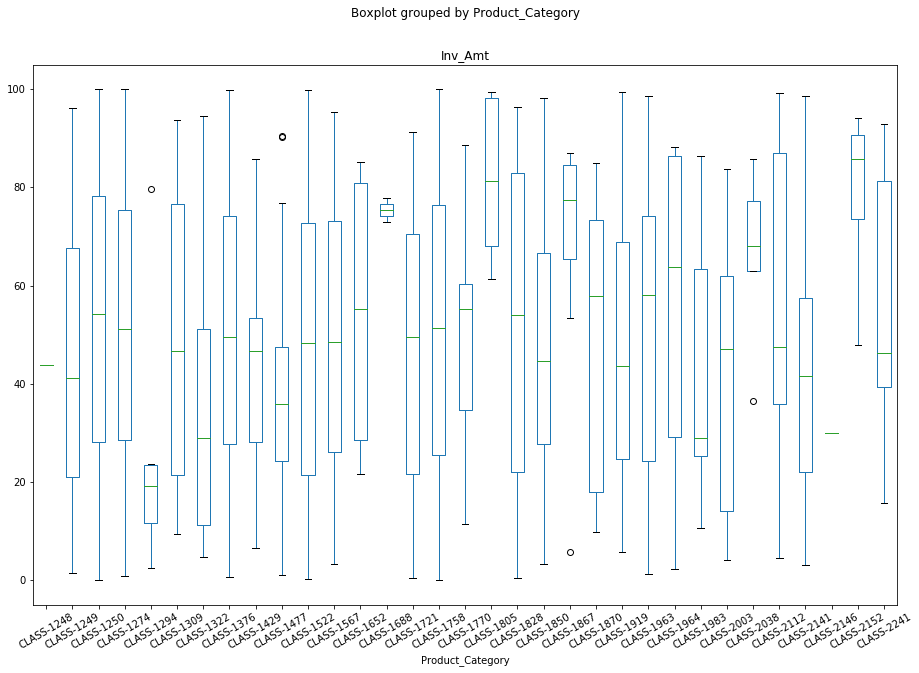

In [76]:
g = data_sample.boxplot(by='Product_Category', column='Inv_Amt', figsize=(15,10), grid=False, rot=30)
# g.set_xticklabels(rotation=30)

# Building the Model

In [7]:
train_set = pd.read_csv('train_set.csv')
test_set = pd.read_csv('test_set.csv')

In [8]:
X = train_set.drop('Product_Category', axis=1)
y = train_set['Product_Category'].copy()

In [9]:
# Preprocessing the categorical data
from sklearn.preprocessing import LabelEncoder

# Label Encoding the Categorical Data: Vendor_Code
le_vendor_code = LabelEncoder()
X['Vendor_Code'] = le_vendor_code.fit_transform(X['Vendor_Code'])

# Label Encoding the Categorical Data: GL_Code
le_gl_code = LabelEncoder()
X['GL_Code'] = le_gl_code.fit_transform(X['GL_Code'])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [11]:
print('Unique Item Description: ' + str(len(X_train['Item_Description'].unique())))
print('Total Item Description: ' + str(len(X_train['Item_Description'])))

Unique Item Description: 3697
Total Item Description: 3701


In [12]:
# Dropping Item_Description as it is not a relevant feature, from both the training and test data
X_train.drop('Item_Description', axis=1, inplace=True)
X_test.drop('Item_Description', axis=1, inplace=True)

C:\Users\letitbe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\letitbe\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
print('Unique Invoice Id: ' + str(len(X_train['Inv_Id'].unique())))
print('Total Invoice Id: ' + str(len(X_train['Inv_Id'])))

Unique Invoice Id: 3701
Total Invoice Id: 3701


In [14]:
# Dropping Inv_Id as it not a relevant feature, from both the training and test data
X_train.drop('Inv_Id', axis=1, inplace=True)
X_test.drop('Inv_Id', axis=1, inplace=True)

C:\Users\letitbe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\letitbe\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
# We're lucky we don't have any Empty Cells
X_train.isna().sum()

Vendor_Code    0
GL_Code        0
Inv_Amt        0
dtype: int64

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Initialising 'Decision Tree' Model
model = DecisionTreeClassifier(random_state=0)

# Training the 'Decision Tree' model
model.fit(X_train, y_train)

# Finding the accuracy of 'Decision Tree' Model
acc = model.score(X_test, y_test)

# Printing the accuracy
print('Accuracy of the model:  {:.2f}%'.format(acc*100))

Accuracy of the model:  89.54%


In [17]:
# Replacing Unknown Data with 'OTHER' for Label Encoding
test_set['Vendor_Code'] = test_set['Vendor_Code'].map(lambda s: 'OTHER' if s not in le_vendor_code.classes_ else s)
test_set['GL_Code'] = test_set['GL_Code'].map(lambda s: 'OTHER' if s not in le_gl_code.classes_ else s)

# Appending 'OTHER' to Label_Encoder_Vendor_Codes
le_vendor_code_classes = le_vendor_code.classes_.tolist()
le_vendor_code_classes.append('OTHER')
le_vendor_code.classes_ = le_vendor_code_classes

# Appending 'OTHER' to Label_Encoder_GL_Code
le_gl_code_classes = le_gl_code.classes_.tolist()
le_gl_code_classes.append('OTHER')
le_gl_code.classes_ = le_gl_code_classes

In [18]:
# Transforming the test_set Categorical Data
test_set['Vendor_Code'] = le_vendor_code.transform(test_set['Vendor_Code'])
test_set['GL_Code'] = le_gl_code.transform(test_set['GL_Code'])

In [19]:
submission_set = pd.DataFrame(columns=['Inv_Id', 'Product_Category'])
submission_set['Inv_Id'] = test_set['Inv_Id']
test_set.drop(['Inv_Id', 'Item_Description'], axis=1, inplace=True)

In [20]:
submission_set['Product_Category'] = model.predict(test_set)

In [21]:
submission_set.head(5)

,Inv_Id,Product_Category
0,15041,CLASS-1274
1,15094,CLASS-1963
2,15112,CLASS-1758
3,15179,CLASS-1522
4,15212,CLASS-1567


In [22]:
submission_set.to_csv('submission.csv')

In [23]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


#Different models initialised
log_clf_1 = LogisticRegression(random_state=0)
log_clf_2 = LogisticRegression(random_state=42)
decision_clf1 = DecisionTreeClassifier(criterion = 'entropy',random_state=0)
decision_clf2 = DecisionTreeClassifier(criterion = 'entropy', random_state=42)


#Creation of list of models
Model_List=[('Logistic Regression 1', log_clf_1),
            ('Logistic Regression 2', log_clf_2),
            ('Decision Tree 1', decision_clf1),
            ('Decision Tree 2', decision_clf2)]


In [30]:
voting_clf_soft = VotingClassifier(estimators=Model_List, voting='soft')
voting_clf_soft.fit(X_train, y_train)
soft_voting_score = voting_clf_soft.score(X_test, y_test)

print(soft_voting_score)

0.9073724007561437


C:\Users\letitbe\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
